In [403]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [430]:
shared_control_ssrt = pd.read_csv("/Users/kritiaxh/Documents/PoldrackLab/SharedControl/notebooks/analysis/output/shared_control_metrics_ssrt.csv")
simple_stop_ssrt = pd.read_csv("/Users/kritiaxh/Documents/PoldrackLab/SharedControl/notebooks/analysis/output/simple_stop_metrics.csv")
participant_tracking = pd.read_csv('/Users/kritiaxh/Documents/PoldrackLab/SharedControl/data/participant_tracking.csv')
survey_results = pd.read_csv('/Users/kritiaxh/Documents/PoldrackLab/SharedControl/notebooks/analysis/output/survey_scores.csv')
go_task_accuracy_before_stop_onset = pd.read_csv('/Users/kritiaxh/Documents/PoldrackLab/SharedControl/notebooks/analysis/output/shared_control_metrics_go_task_accuracy_before_stop_onset.csv')
duration_of_inhibition = pd.read_csv("/Users/kritiaxh/Documents/PoldrackLab/SharedControl/notebooks/analysis/output/shared_control_metrics_duration_of_inhibition.csv")
proportion_of_trials_with_stop_moment = pd.read_csv("/Users/kritiaxh/Documents/PoldrackLab/SharedControl/notebooks/analysis/output/proportion_of_trials_with_stop_moment.csv")

In [405]:
# Set the first column as the index to use for merging (assuming it's the subject ID)
shared_control_ssrt.columns = ['subject_id'] + list(shared_control_ssrt.columns[1:])
simple_stop_ssrt.columns = ['subject_id'] + list(simple_stop_ssrt.columns[1:])

# Merge by the first (subject_id) column
merged_df = pd.merge(shared_control_ssrt, simple_stop_ssrt[['subject_id', 'ssrt']], on='subject_id', how='left')

# Rename the SSRT column from simple_stop_ssrt to 'simple_stop_ssrt'
merged_df.rename(columns={'ssrt': 'simple_stop_ssrt'}, inplace=True)

# Set the 'subject_id' column as the index
# merged_df.set_index('subject_id', inplace=True)

# Remove the last row, assuming it's the mean row
merged_df = merged_df.iloc[:-1, :]

# Check the merged dataframe
print(merged_df)

   subject_id  non_ai_ssrt   ai_ssrt  ai_ai_ssrt  simple_stop_ssrt
0        s004     0.222370  0.242520    0.255618          0.206134
1        s005     0.219656  0.232827    0.259703          0.160407
2        s006     0.252661  0.256714    0.293884          0.176054
3        s007     0.258807  0.284119    0.338713          0.203817
4        s008     0.241636  0.255048    0.298183          0.183402
5        s009     0.222365  0.259465    0.255665          0.222842
6        s010     0.246101  0.249927    0.257013          0.169163
7        s011     0.213532  0.246637    0.250694          0.186240
8        s012     0.219835  0.241968    0.233972          0.197466
9        s013     0.266719  0.269863    0.342078          0.278431
10       s014     0.251096  0.230776    0.256233          0.217073
11       s015     0.297396  0.380136    0.336576          0.240112
12       s016     0.299043  0.268403    0.430194          0.252519
13       s017     0.214238  0.267408    0.288116          0.18

In [406]:
mean_df = np.mean(merged_df["ai_ssrt"])
mean_std = np.std(merged_df["ai_ssrt"])
print(mean_df, mean_std)

print(mean_df + 3*mean_std)

0.265243697571541 0.0332693728193312
0.36505181602953457


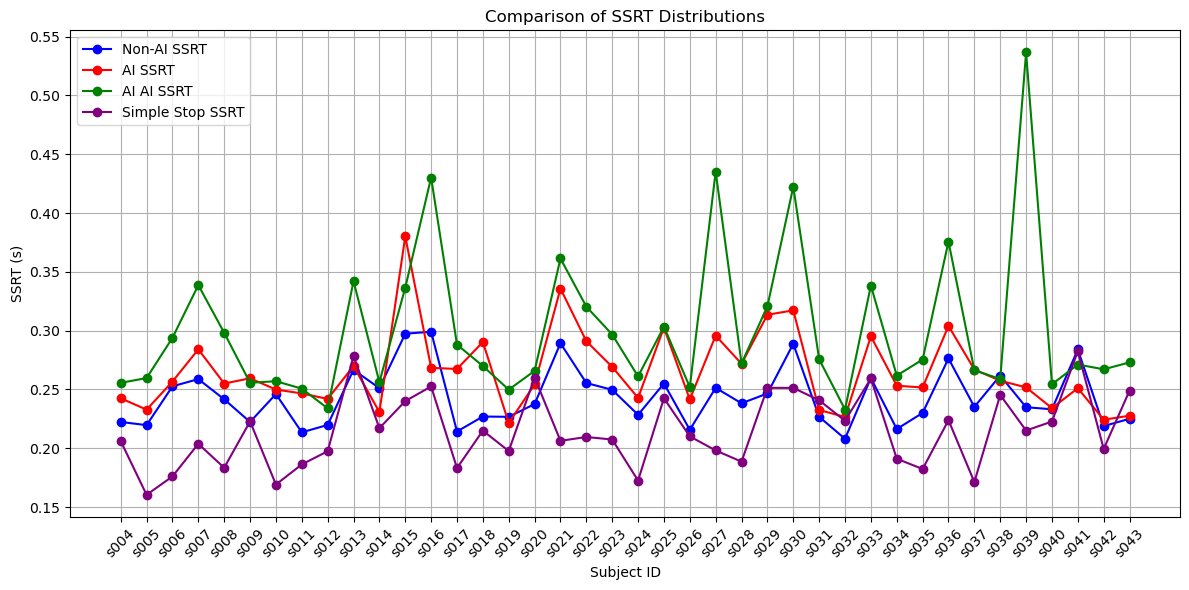

In [407]:
#Create a line plot of SSRt
# Plotting the SSRT distributions together
plt.figure(figsize=(12, 6))

# Plot each condition's SSRT on the same axes
plt.plot(merged_df['subject_id'], merged_df['non_ai_ssrt'], label='Non-AI SSRT', marker='o', color='blue')
plt.plot(merged_df['subject_id'], merged_df['ai_ssrt'], label='AI SSRT', marker='o', color='red')
plt.plot(merged_df['subject_id'], merged_df['ai_ai_ssrt'], label='AI AI SSRT', marker='o', color='green')
plt.plot(merged_df['subject_id'], merged_df['simple_stop_ssrt'], label='Simple Stop SSRT', marker='o', color='purple')

# Titles and labels
plt.title('Comparison of SSRT Distributions')
plt.xlabel('Subject ID')
plt.ylabel('SSRT (s)')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()

# Save the figure and show
plt.savefig('figures/ssrt_distributions_comparison.png', dpi=300)
plt.show()

/var/folders/8s/r02gjh_90hqdkx4nmh9szbsw0000gn/T/ipykernel_35677/1231073786.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Condition', y='SSRT', data=melted_df, palette={"non_ai_ssrt": "teal", "ai_ssrt": "chocolate"})


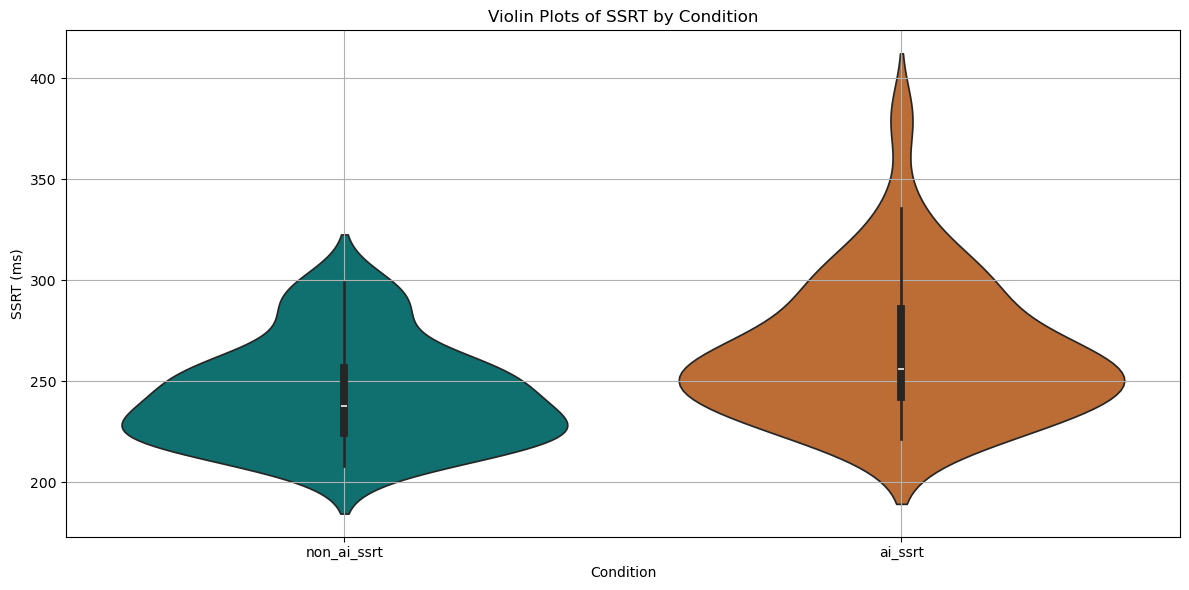

In [408]:
#Create violin plots of AI vs non AI SSRT
# Set up the figure for the violin plots
plt.figure(figsize=(12, 6))

# Combine the data into a long format suitable for Seaborn
melted_df = merged_df.melt(id_vars='subject_id', value_vars=['non_ai_ssrt', 'ai_ssrt'],
                            var_name='Condition', value_name='SSRT')
melted_df['SSRT'] *= 1000
# Create violin plots
sns.violinplot(x='Condition', y='SSRT', data=melted_df, palette={"non_ai_ssrt": "teal", "ai_ssrt": "chocolate"})

# Add titles and labels
plt.title('Violin Plots of SSRT by Condition')
plt.xlabel('Condition')
plt.ylabel('SSRT (ms)')
plt.grid()

# Save and show the plot
plt.tight_layout()
plt.savefig('figures/ai_vs_non_ai_ssrt_violin_plots.png', dpi=300)
plt.show()

/var/folders/8s/r02gjh_90hqdkx4nmh9szbsw0000gn/T/ipykernel_35677/2977246626.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Condition', y='SSRT', data=melted_df, palette={"non_ai_ssrt": "teal", "ai_ssrt": "chocolate", 'ai_ai_ssrt': "darkgray", 'simple_stop_ssrt': "lightsalmon"})


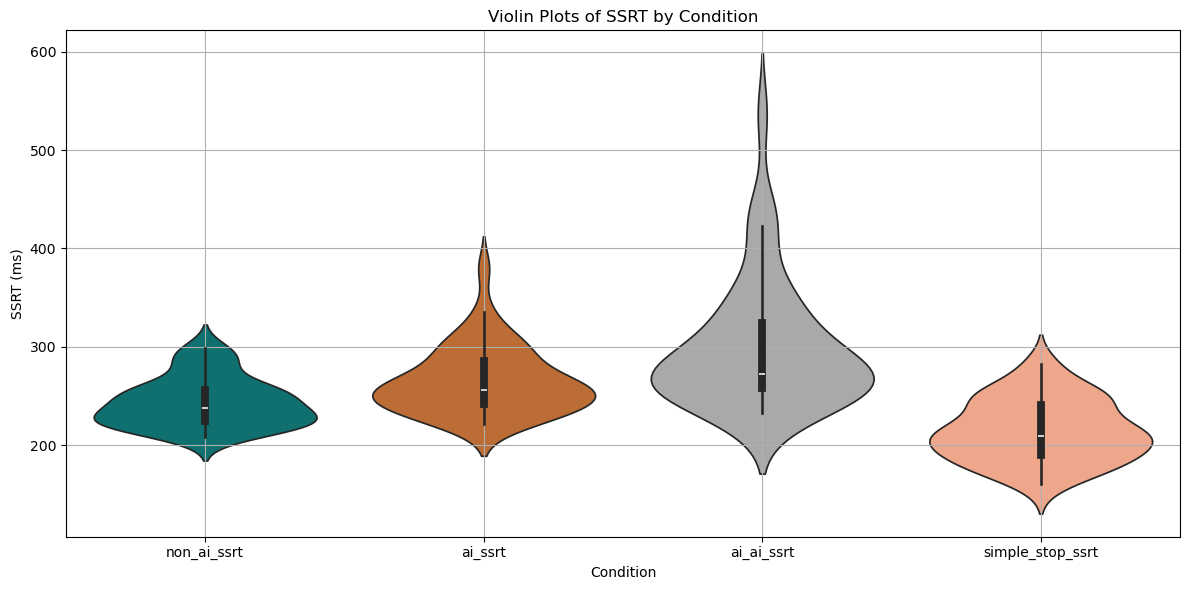

In [409]:
#Create violin plots of all SSRT
# Set up the figure for the violin plots
plt.figure(figsize=(12, 6))

# Combine the data into a long format suitable for Seaborn
melted_df = merged_df.melt(id_vars='subject_id', value_vars=['non_ai_ssrt', 'ai_ssrt', 'ai_ai_ssrt', 'simple_stop_ssrt'],
                            var_name='Condition', value_name='SSRT')
melted_df['SSRT'] *= 1000
# Create violin plots
sns.violinplot(x='Condition', y='SSRT', data=melted_df, palette={"non_ai_ssrt": "teal", "ai_ssrt": "chocolate", 'ai_ai_ssrt': "darkgray", 'simple_stop_ssrt': "lightsalmon"})

# Add titles and labels
plt.title('Violin Plots of SSRT by Condition')
plt.xlabel('Condition')
plt.ylabel('SSRT (ms)')
plt.grid()

# Save and show the plot
plt.tight_layout()
plt.savefig('figures/all_ssrt_violin_plots.png', dpi=300)
plt.show()

/var/folders/8s/r02gjh_90hqdkx4nmh9szbsw0000gn/T/ipykernel_35677/538981503.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Condition', y='SSRT', data=melted_df, palette={"non_ai_duration_of_inhibition": "teal", "ai_duration_of_inhibition": "chocolate", 'ai_ai_duration_of_inhibition': "darkgray"})


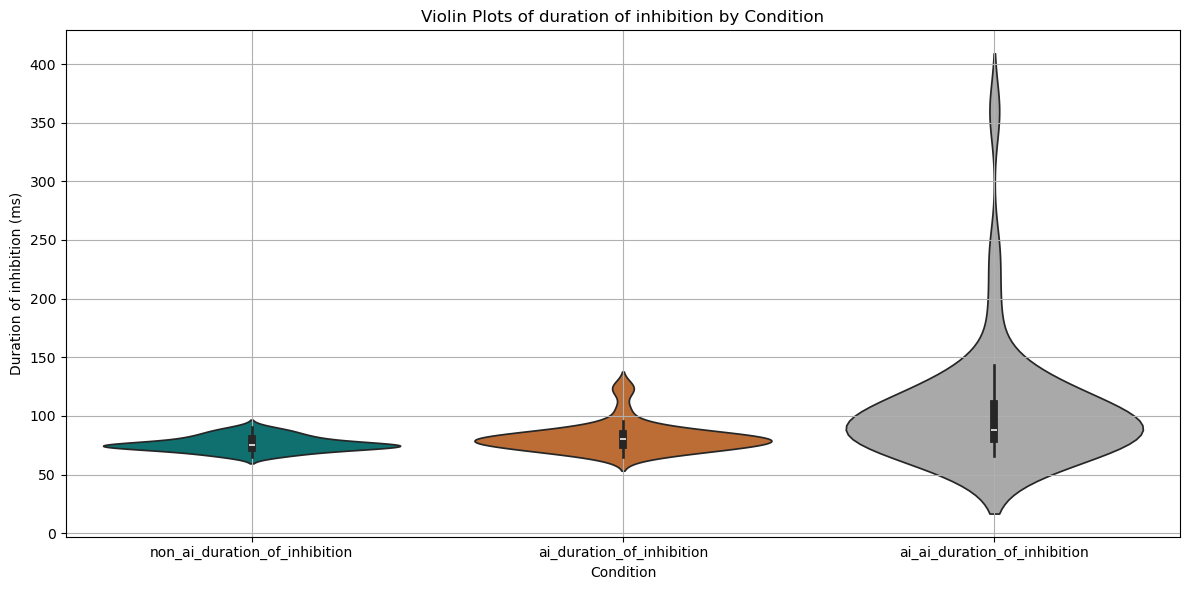

In [410]:
#Create violin plots for duration of inhibition
# Reset the index to make 'subject_id' a column
duration_of_inhibition.reset_index(inplace=True)

# Rename the index column
duration_of_inhibition.rename(columns={'index': 'subject_id'}, inplace=True)

plt.figure(figsize=(12, 6))

# Combine the data into a long format suitable for Seaborn
melted_df = duration_of_inhibition.melt(id_vars='subject_id', value_vars=['non_ai_duration_of_inhibition', 'ai_duration_of_inhibition', 'ai_ai_duration_of_inhibition'],
                            var_name='Condition', value_name='SSRT')
melted_df['SSRT'] *= 1000
# Create violin plots
sns.violinplot(x='Condition', y='SSRT', data=melted_df, palette={"non_ai_duration_of_inhibition": "teal", "ai_duration_of_inhibition": "chocolate", 'ai_ai_duration_of_inhibition': "darkgray"})

# Add titles and labels
plt.title('Violin Plots of duration of inhibition by Condition')
plt.xlabel('Condition')
plt.ylabel('Duration of inhibition (ms)')
plt.grid()

# Save and show the plot
plt.tight_layout()
plt.savefig('figures/all_duration_of_inhibition_violin_plots.png', dpi=300)
plt.show()

/var/folders/8s/r02gjh_90hqdkx4nmh9szbsw0000gn/T/ipykernel_35677/237627121.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Condition', y='SSRT', data=melted_df, palette={"non_ai_duration_of_inhibition": "teal", "ai_duration_of_inhibition": "chocolate"})


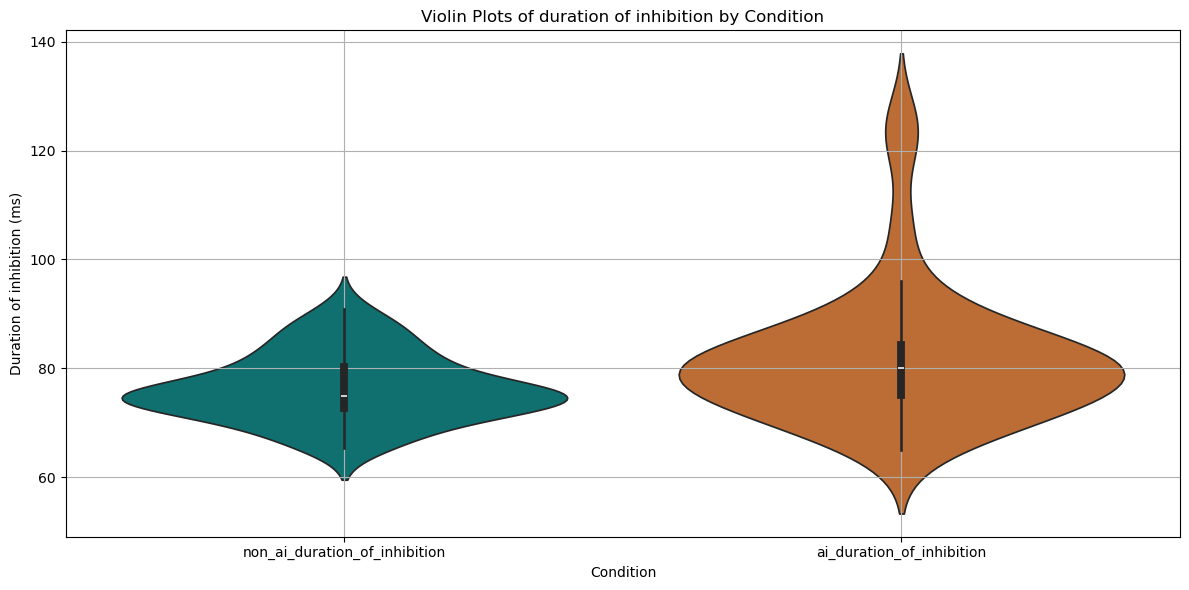

In [411]:
#Create violin plots for duration of inhibition

plt.figure(figsize=(12, 6))

# Combine the data into a long format suitable for Seaborn
melted_df = duration_of_inhibition.melt(id_vars='subject_id', value_vars=['non_ai_duration_of_inhibition', 'ai_duration_of_inhibition'],
                            var_name='Condition', value_name='SSRT')
melted_df['SSRT'] *= 1000
# Create violin plots
sns.violinplot(x='Condition', y='SSRT', data=melted_df, palette={"non_ai_duration_of_inhibition": "teal", "ai_duration_of_inhibition": "chocolate"})

# Add titles and labels
plt.title('Violin Plots of duration of inhibition by Condition')
plt.xlabel('Condition')
plt.ylabel('Duration of inhibition (ms)')
plt.grid()

# Save and show the plot
plt.tight_layout()
plt.savefig('figures/non_ai_vs_ai_duration_of_inhibition_violin_plots.png', dpi=300)
plt.show()

/var/folders/8s/r02gjh_90hqdkx4nmh9szbsw0000gn/T/ipykernel_35677/3861343559.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Condition', y='Proportion', data=melted_df, palette={"proportion_non_ai_trials_with_stop_moment": "teal", "proportion_ai_trials_with_stop_moment": "chocolate", 'proportion_ai_ai_trials_with_stop_moment': 'darkgray'})


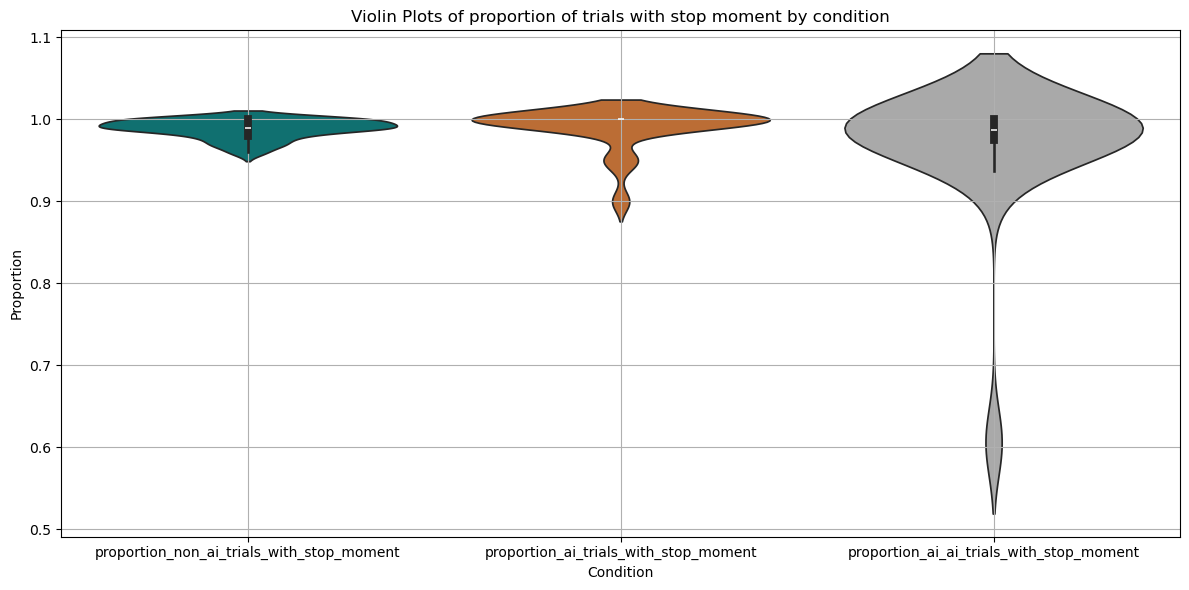

In [432]:
#Create violin plots for proportion of trials with stop moment by condition

plt.figure(figsize=(12, 6))

proportion_of_trials_with_stop_moment.reset_index(inplace=True)
proportion_of_trials_with_stop_moment.rename(columns={'index': 'subject_id'}, inplace=True)
# Combine the data into a long format suitable for Seaborn
melted_df = proportion_of_trials_with_stop_moment.melt(id_vars='subject_id', value_vars=['proportion_non_ai_trials_with_stop_moment', 'proportion_ai_trials_with_stop_moment', 'proportion_ai_ai_trials_with_stop_moment'],
                            var_name='Condition', value_name='Proportion')
# Create violin plots
sns.violinplot(x='Condition', y='Proportion', data=melted_df, palette={"proportion_non_ai_trials_with_stop_moment": "teal", "proportion_ai_trials_with_stop_moment": "chocolate", 'proportion_ai_ai_trials_with_stop_moment': 'darkgray'})

# Add titles and labels
plt.title('Violin Plots of proportion of trials with stop moment by condition')
plt.xlabel('Condition')
plt.ylabel('Proportion')
plt.grid()

# Save and show the plot
plt.tight_layout()
plt.savefig('figures/proportion_of_trials_with_stop_moment.png', dpi=300)
plt.show()

In [412]:
# Reshape the data for repeated measures ANOVA
data_long = pd.melt(merged_df, id_vars=['subject_id'], value_vars=['non_ai_ssrt', 'ai_ssrt', 'simple_stop_ssrt'],
                    var_name='condition', value_name='SSRT')

print(data_long)

# Run the repeated measures ANOVA
aovrm = AnovaRM(data_long, 'SSRT', 'subject_id', within=['condition'])
anova_results = aovrm.fit()
print(anova_results)

    subject_id         condition      SSRT
0         s004       non_ai_ssrt  0.222370
1         s005       non_ai_ssrt  0.219656
2         s006       non_ai_ssrt  0.252661
3         s007       non_ai_ssrt  0.258807
4         s008       non_ai_ssrt  0.241636
..         ...               ...       ...
115       s039  simple_stop_ssrt  0.215070
116       s040  simple_stop_ssrt  0.222738
117       s041  simple_stop_ssrt  0.282436
118       s042  simple_stop_ssrt  0.199412
119       s043  simple_stop_ssrt  0.248984

[120 rows x 3 columns]
                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
condition 51.7054 2.0000 78.0000 0.0000



In [413]:
# Conduct the paired t-tests for planned comparisons

# Comparison 1: AI Stop vs non-AI Stop
ai_vs_non_ai = stats.ttest_rel(merged_df['ai_ssrt'], merged_df['non_ai_ssrt'])
print(f"AI Stop vs Non-AI Stop SSRT Comparison: t-statistic = {ai_vs_non_ai.statistic}, p-value = {ai_vs_non_ai.pvalue}")

# Comparison 2: Non-AI vs Simple Stopping
non_ai_vs_simple = stats.ttest_rel(merged_df['non_ai_ssrt'], merged_df['simple_stop_ssrt'])
print(f"Non-AI vs Simple Stopping SSRT Comparison: t-statistic = {non_ai_vs_simple.statistic}, p-value = {non_ai_vs_simple.pvalue}")

AI Stop vs Non-AI Stop SSRT Comparison: t-statistic = 5.616398897831615, p-value = 1.765719683873891e-06
Non-AI vs Simple Stopping SSRT Comparison: t-statistic = 6.362698988629167, p-value = 1.624591647785976e-07


In [414]:
# Calculate order effects between AI being first or Non-AI being first
non_ai_first_subs = participant_tracking[participant_tracking["Cond Order"] == 1]["Subject"].to_list()
ai_first_subs = participant_tracking[participant_tracking["Cond Order"] == 2]["Subject"].to_list()

ssrt_non_ai_first_non_ai = []
ssrt_ai_first_non_ai = []
ssrt_non_ai_first_ai = []
ssrt_ai_first_ai = []
ssrt_non_ai_first_ai_ai = []
ssrt_ai_first_ai_ai = []

for sub in non_ai_first_subs:
    ssrt = shared_control_ssrt[shared_control_ssrt['subject_id'] == sub]["non_ai_ssrt"].values
    ssrt_non_ai_first_non_ai.append(ssrt[0])
    ssrt = shared_control_ssrt[shared_control_ssrt['subject_id'] == sub]["ai_ssrt"].values
    ssrt_non_ai_first_ai.append(ssrt[0])
    ssrt = shared_control_ssrt[shared_control_ssrt['subject_id'] == sub]["ai_ai_ssrt"].values
    ssrt_non_ai_first_ai_ai.append(ssrt[0])

for sub in ai_first_subs:
    ssrt = shared_control_ssrt[shared_control_ssrt['subject_id'] == sub]["non_ai_ssrt"].values
    ssrt_ai_first_non_ai.append(ssrt[0])
    ssrt = shared_control_ssrt[shared_control_ssrt['subject_id'] == sub]["ai_ssrt"].values
    ssrt_ai_first_ai.append(ssrt[0])
    ssrt = shared_control_ssrt[shared_control_ssrt['subject_id'] == sub]["ai_ai_ssrt"].values
    ssrt_ai_first_ai_ai.append(ssrt[0])

t_stat, p_value = stats.ttest_ind(ssrt_ai_first_non_ai, ssrt_non_ai_first_non_ai, equal_var=False)
print(f'Non AI SSRT" {t_stat}, {p_value}')
t_stat, p_value = stats.ttest_ind(ssrt_ai_first_ai, ssrt_non_ai_first_ai, equal_var=False)
print(f'AI SSRT" {t_stat}, {p_value}')
t_stat, p_value = stats.ttest_ind(ssrt_ai_first_ai_ai, ssrt_non_ai_first_ai_ai, equal_var=False)
print(f'AI AI SSRT" {t_stat}, {p_value}')


Non AI SSRT" 1.1611734733567018, 0.2528248670945422
AI SSRT" 1.1971064010639385, 0.23882163492528155
AI AI SSRT" -0.2799797706417339, 0.7814164780857645


In [415]:
print(merged_df)

   subject_id  non_ai_ssrt   ai_ssrt  ai_ai_ssrt  simple_stop_ssrt
0        s004     0.222370  0.242520    0.255618          0.206134
1        s005     0.219656  0.232827    0.259703          0.160407
2        s006     0.252661  0.256714    0.293884          0.176054
3        s007     0.258807  0.284119    0.338713          0.203817
4        s008     0.241636  0.255048    0.298183          0.183402
5        s009     0.222365  0.259465    0.255665          0.222842
6        s010     0.246101  0.249927    0.257013          0.169163
7        s011     0.213532  0.246637    0.250694          0.186240
8        s012     0.219835  0.241968    0.233972          0.197466
9        s013     0.266719  0.269863    0.342078          0.278431
10       s014     0.251096  0.230776    0.256233          0.217073
11       s015     0.297396  0.380136    0.336576          0.240112
12       s016     0.299043  0.268403    0.430194          0.252519
13       s017     0.214238  0.267408    0.288116          0.18

In [416]:
def correlate_and_plot_survey_scores(column_name):
    #Find the correlation between the survey score and the difference between AI Stop SSRT and Non AI SSRT for each subject
    # Merge without duplicates
    avg_df = merged_df.merge(survey_results, on='subject_id', how='left')

    # Compute the difference between ai and non-ai SSRT
    avg_df['difference_ai_and_non_ai_ssrt'] = avg_df['ai_ssrt'] - avg_df['non_ai_ssrt']

    # Compute the correlation
    correlation, pval = stats.pearsonr(avg_df["difference_ai_and_non_ai_ssrt"], avg_df[column_name])
    print(f"Correlation and p-value between SSRT and survey scores: {correlation}, {pval}")

    avg_df.to_csv(f'/Users/kritiaxh/Documents/PoldrackLab/SharedControl/notebooks/analysis/output/{column_name}_survey_by_ssrt.csv')

    avg_df['difference_ai_and_non_ai_ssrt'] *= 1000 #convert to ms

    # Create a scatter plot#
    plt.figure(figsize=(10, 6))
    plt.scatter(avg_df['difference_ai_and_non_ai_ssrt'], avg_df['average_score'], alpha=0.7)
    plt.title(f'Scatter Plot: {column_name} by SSRT')
    plt.xlabel('Difference between AI and Non AI SSRT (ms)')
    plt.ylabel('Survey Scores')
    plt.grid()
    plt.axhline(0, color='red', linestyle='--')  # Optional: Add a line at y = 0 for reference
    plt.axvline(0, color='red', linestyle='--')  # Optional: Add a line at x = 0 for reference
    plt.tight_layout()
    plt.savefig(f'/Users/kritiaxh/Documents/PoldrackLab/SharedControl/notebooks/analysis/figures/{column_name}_survey_by_ssrt.png', dpi=300)

Correlation and p-value between SSRT and survey scores: -0.050273491800991776, 0.7580291327103851


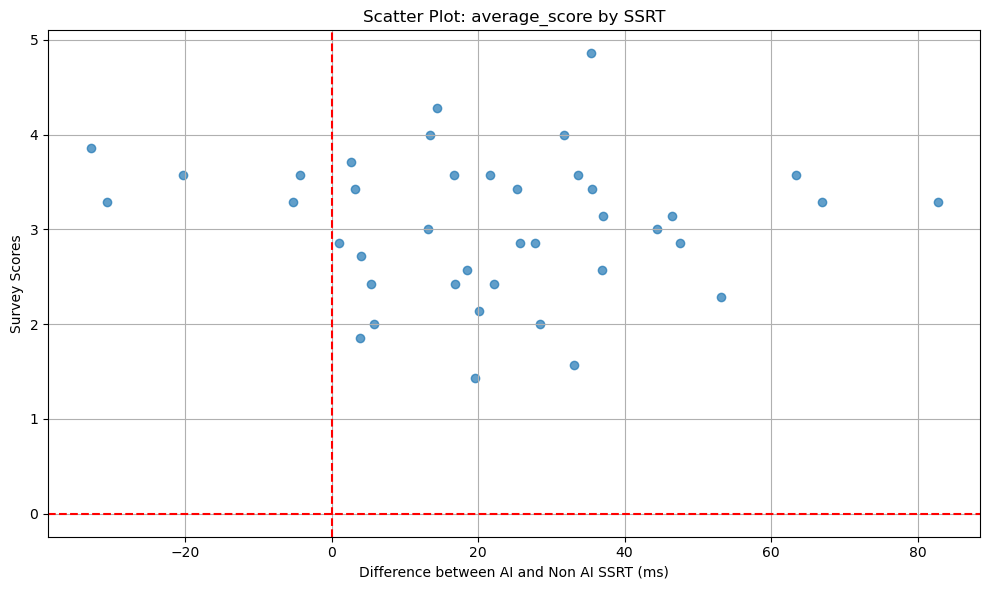

In [417]:
correlate_and_plot_survey_scores('average_score')

Correlation and p-value between SSRT and survey scores: -0.05027349180099174, 0.7580291327103851


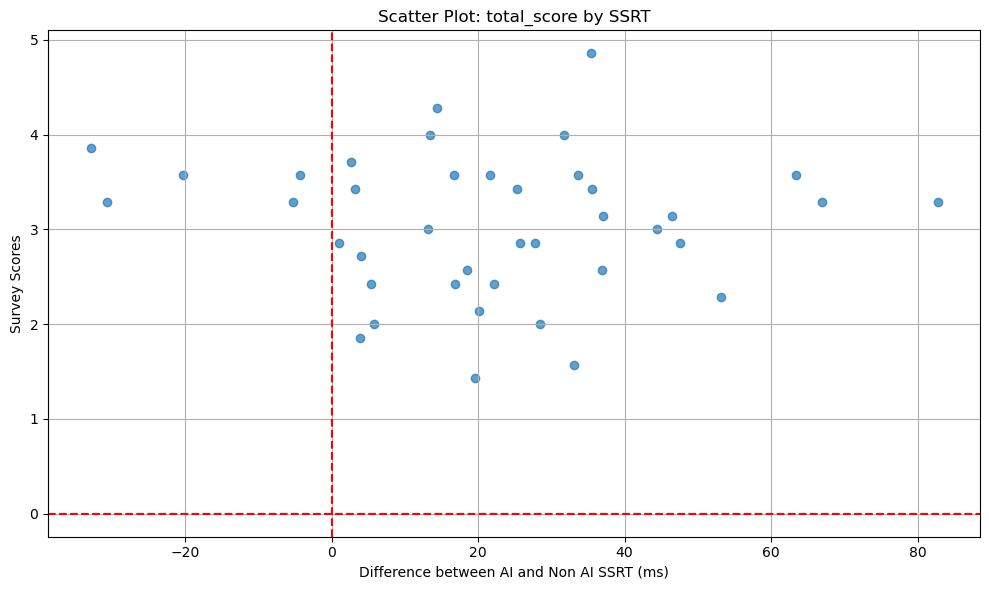

In [418]:
correlate_and_plot_survey_scores('total_score')

Correlation and p-value between SSRT and survey scores: -0.17099934698418437, 0.29142729500524267


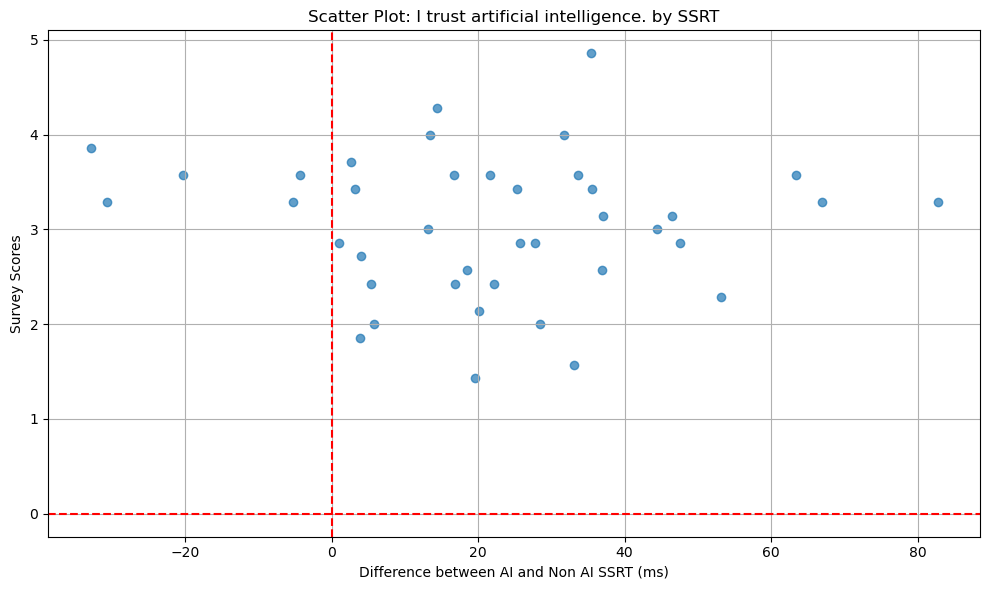

In [419]:
correlate_and_plot_survey_scores('I trust artificial intelligence.')

Correlation and p-value between SSRT and survey scores: 0.11183214465404323, 0.49206989228173403


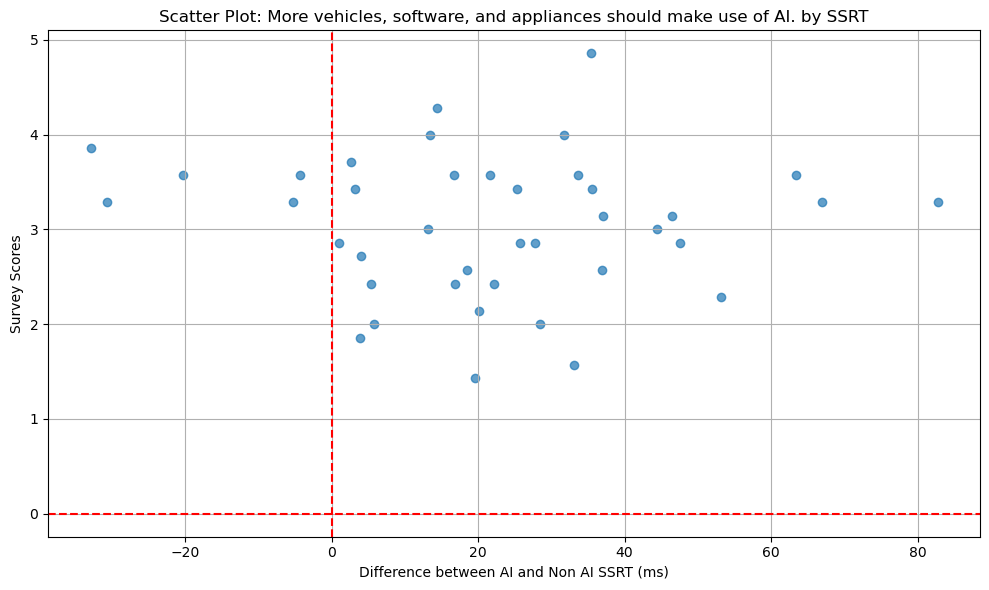

In [420]:
correlate_and_plot_survey_scores('More vehicles, software, and appliances should make use of AI.')

Correlation and p-value between SSRT and survey scores: 0.2090744568757621, 0.19541108767886145


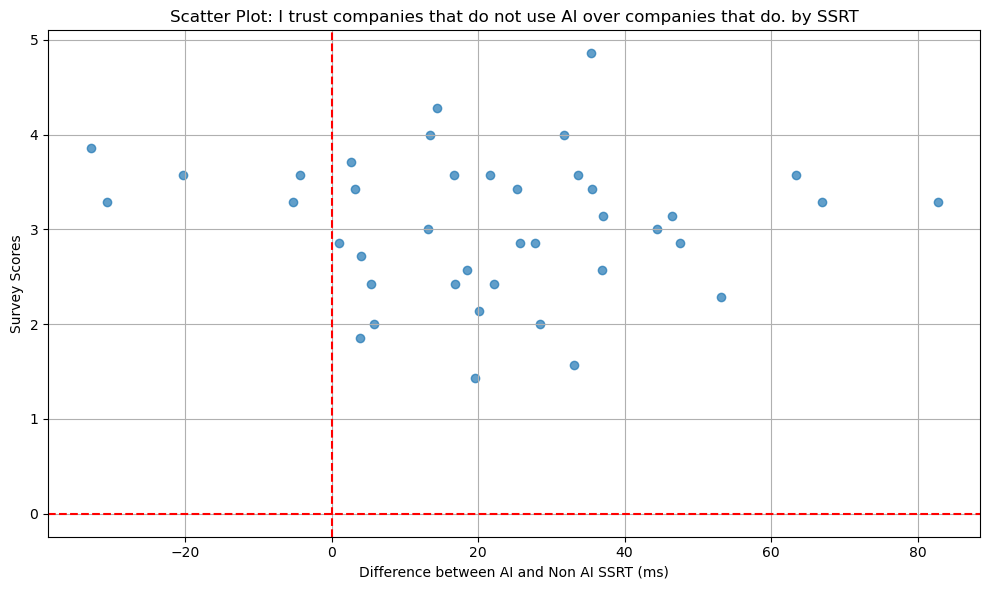

In [421]:
correlate_and_plot_survey_scores('I trust companies that do not use AI over companies that do.')

Correlation and p-value between SSRT and survey scores: -0.035368902016636214, 0.8284678948707205


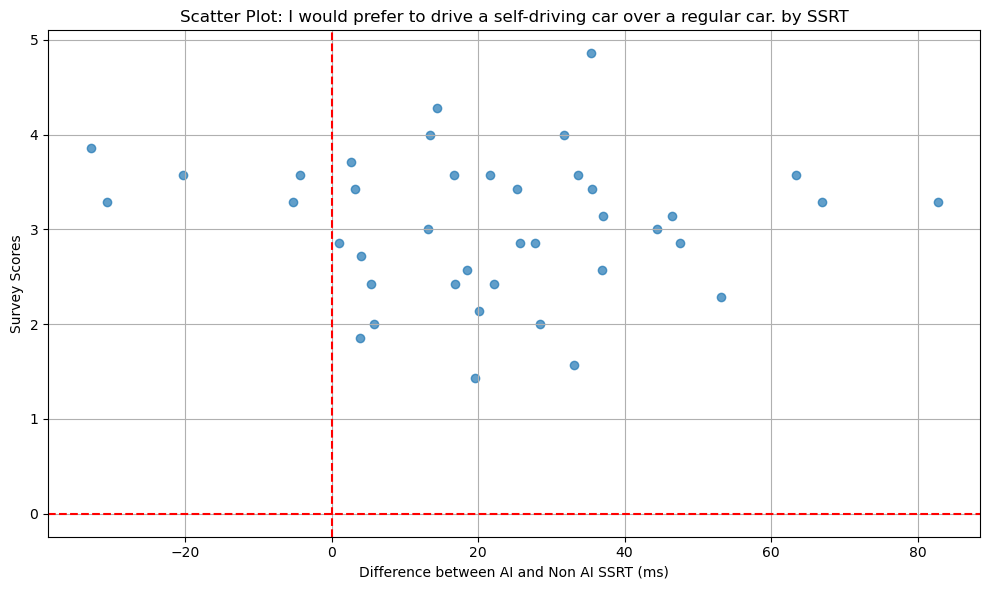

In [422]:
correlate_and_plot_survey_scores('I would prefer to drive a self-driving car over a regular car.')

Correlation and p-value between SSRT and survey scores: -0.09080088862357336, 0.5773783666904873


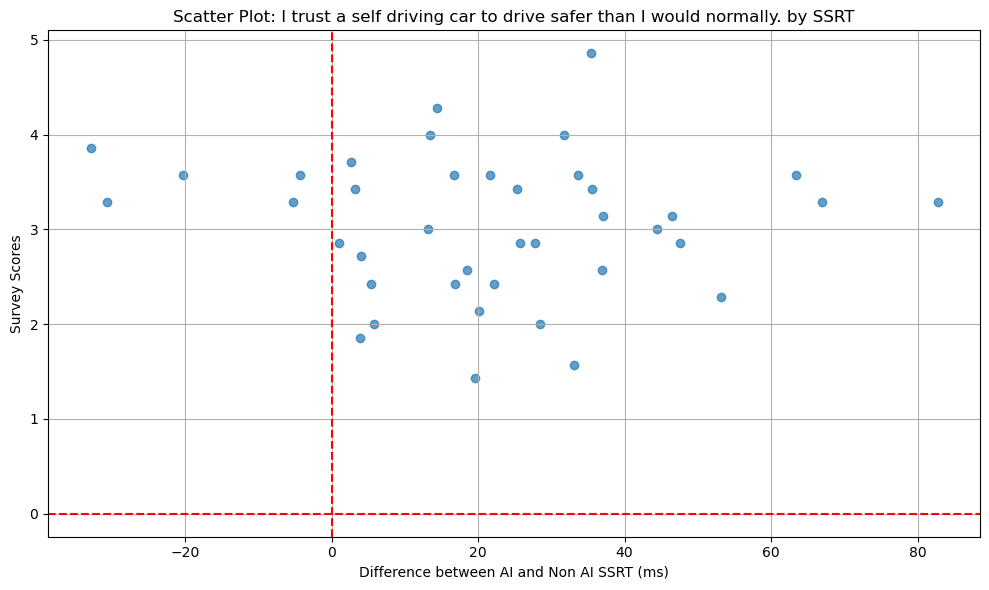

In [423]:
correlate_and_plot_survey_scores('I trust a self driving car to drive safer than I would normally.')

Correlation and p-value between SSRT and survey scores: -0.17317277082821975, 0.28524536528152894


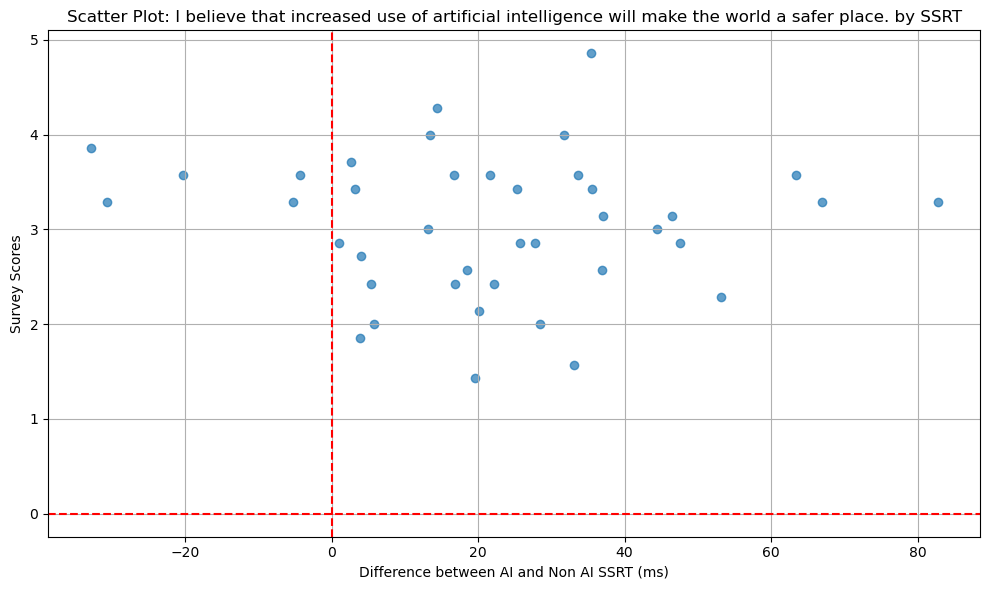

In [424]:
correlate_and_plot_survey_scores('I believe that increased use of artificial intelligence will make the world a safer place.')

Correlation and p-value between SSRT and survey scores: -0.06102390689638161, 0.7083599886190366


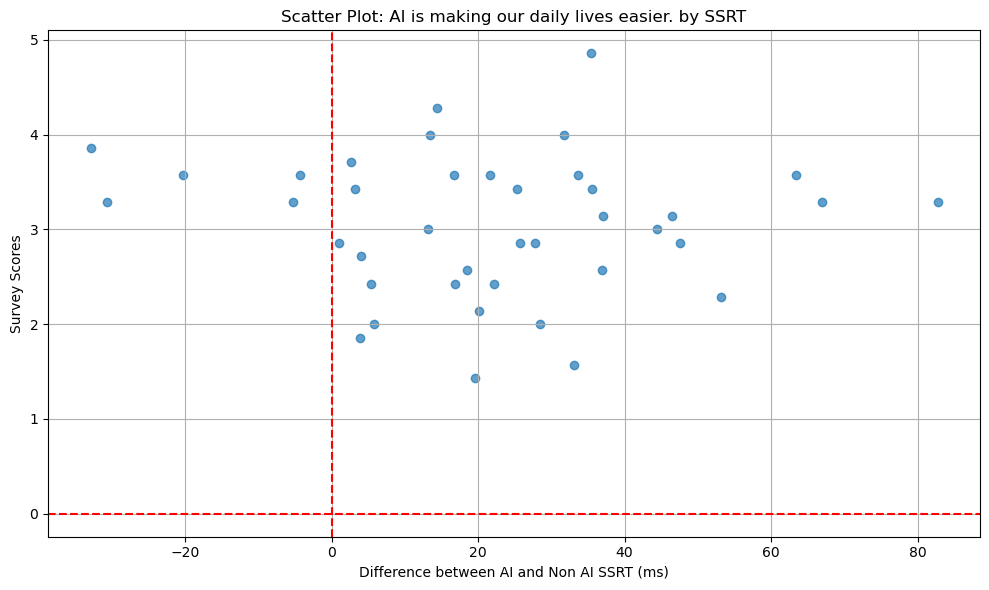

In [425]:
correlate_and_plot_survey_scores('AI is making our daily lives easier.')

/var/folders/8s/r02gjh_90hqdkx4nmh9szbsw0000gn/T/ipykernel_35677/1759515721.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='slowing_type', y='difference_ms', data=violin_data, palette={'Non-Proactive': 'skyblue', 'Proactive': 'thistle'})


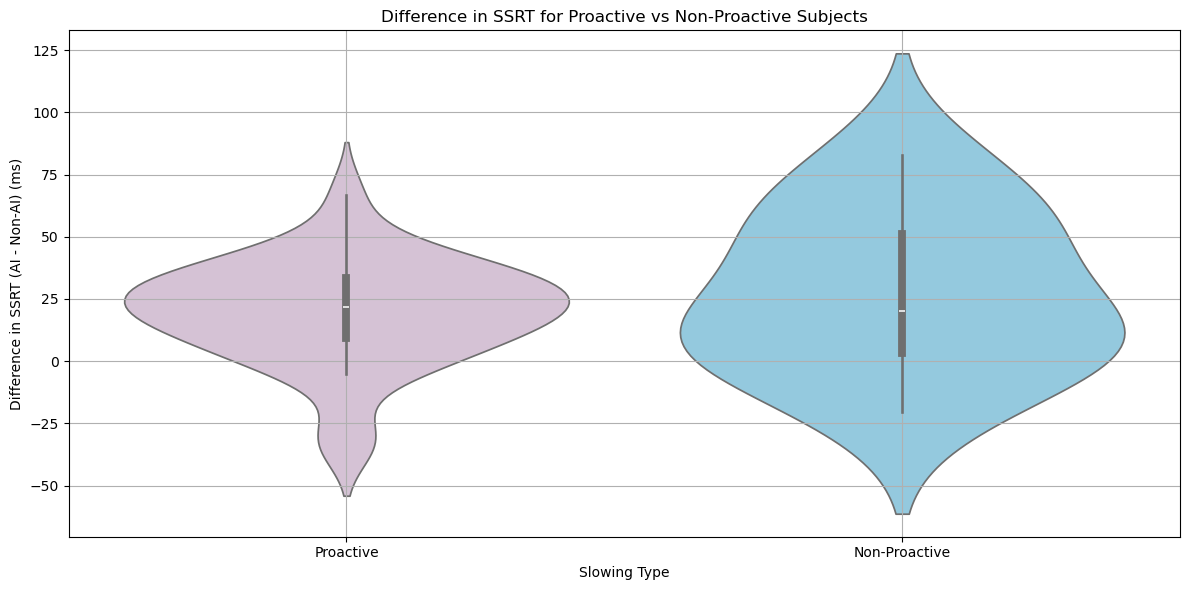

In [426]:
#Create violin plots of AI - Non AI SSRT in proactive vs non-proactive slowing subjects

# Identify non-proactive slowing subjects
non_proactive_slowing_subs = (go_task_accuracy_before_stop_onset['non_ai_go_task_accuracy_before_stop_onset'] > 
                              go_task_accuracy_before_stop_onset['ai_go_task_accuracy_before_stop_onset'])
non_proactive_subjects = go_task_accuracy_before_stop_onset.index[non_proactive_slowing_subs].tolist()

# Extract SSRT values for AI and Non-AI conditions
ssrt_non_ai = shared_control_ssrt['non_ai_ssrt']
ssrt_ai = shared_control_ssrt['ai_ssrt']

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'subject_id': shared_control_ssrt.index,
    'ssrt_non_ai': ssrt_non_ai,
    'ssrt_ai': ssrt_ai
})

# Calculate the difference between AI SSRT and Non-AI SSRT
plot_data['difference'] = plot_data['ssrt_ai'] - plot_data['ssrt_non_ai']

# Classify subjects based on proactive slowing
plot_data['slowing_type'] = ['Non-Proactive' if subject in non_proactive_subjects else 'Proactive' 
                              for subject in plot_data['subject_id']]

plot_data['difference_ms'] = plot_data['difference'] * 1000

# Prepare DataFrame for violin plots
violin_data = plot_data[['difference_ms', 'slowing_type']]

# Plotting
plt.figure(figsize=(12, 6))

# Create violin plot
sns.violinplot(x='slowing_type', y='difference_ms', data=violin_data, palette={'Non-Proactive': 'skyblue', 'Proactive': 'thistle'})

# Adding labels and title
plt.title('Difference in SSRT for Proactive vs Non-Proactive Subjects')
plt.xlabel('Slowing Type')
plt.ylabel('Difference in SSRT (AI - Non-AI) (ms)')

# Optional: Add grid lines
plt.grid()

# Save the figure
plt.tight_layout()
plt.savefig('figures/ssrt_difference_proactive_vs_non_proactive.png', dpi=300) 
plt.show()

In [427]:
import subprocess
import re

# Run pip freeze and capture output
result = subprocess.run(['pip', 'freeze'], capture_output=True, text=True)

# Use a regex to remove lines that include 'file:///'
cleaned_output = re.sub(r' @ file://[^\n]+', '', result.stdout)

# Write the cleaned output to a new requirements.txt file
with open('requirements.txt', 'w') as f:
    f.write(cleaned_output)

print("Cleaned requirements.txt has been generated.")

Cleaned requirements.txt has been generated.
